# 1 Data Aquisition 

In [1]:
from matplotlib import pyplot as plt
import cv2 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier as knc


#Display group image
#load
group = cv2.imread('GROUP.JPG', 0)

#display
plt.title("Group Image")
plt.imshow(group, cmap="gray");plt.axis('off');plt.show()



<Figure size 640x480 with 1 Axes>

# Theory for part 1

1. Describe how you selected the images with respect to the conditions of the detection/classification methods

I took 10 pictures of myself and 10 pictures each of two friends, making sure that the person is looking at the camera in order to try make the images as clustered as possible. 
I then resized the images to 512x512 pixels each and converted them to grayscale as it allows to reduce the dimensions of the data and makes it easier/quicker to detect and classify. 

# 2 Eigenvector Representation

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


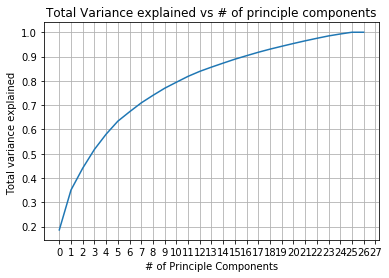

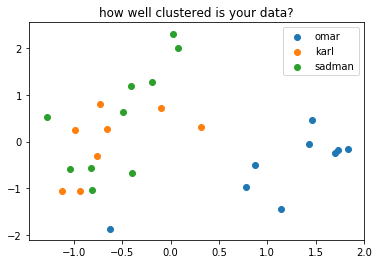

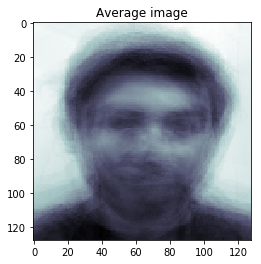

(27, 16384)


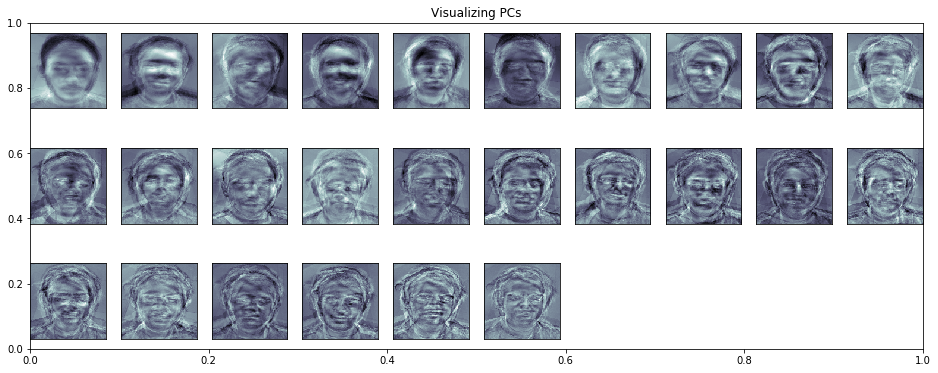

In [2]:
#import images onto a list, images in grayscale=0, resize each image to 512x512
omar = [cv2.resize(cv2.imread('O' + str(i) + '.JPG', 0), (128, 128)) for i in range(1,11)]
sadman = [cv2.resize(cv2.imread('S' + str(i) + '.JPG', 0), (128, 128)) for i in range(1,11)]
karl = [cv2.resize(cv2.imread('K' + str(i) + '.JPG', 0), (128, 128)) for i in range(1,11)]

# Concatenate all images into one array
osk = np.concatenate((omar, sadman, karl), axis=0)

# Reshape each image to be one long array instead of a matrix
omar = np.array(omar).reshape((10,16384))
sadman = np.array(sadman).reshape((10,16384))
karl = np.array(karl).reshape((10,16384))

#put in one array, this is the DATA array
osk_data = np.concatenate((omar, sadman, karl), axis=0)

#compute mean, might not need this now
omar_mn = omar.mean(axis=0)
sadman_mn= sadman.mean(axis=0)
karl_mn= karl.mean(axis=0)

#concatenate in one array
osk_means = np.concatenate((omar_mn,sadman_mn,karl_mn), axis=0).astype(int)

# mean image
mean_osk = osk.mean(0)

# create classification lists for each 
omarclass= ['omar','omar','omar','omar','omar','omar','omar','omar','omar','omar']
sadmanclass = ['sadman','sadman','sadman','sadman','sadman','sadman','sadman','sadman','sadman','sadman']
karlclass = ['karl','karl','karl','karl','karl','karl','karl','karl','karl','karl']

#concatenate in one list
classified = np.concatenate((omarclass,sadmanclass,karlclass), axis=0)

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(osk_data, classified, train_size=0.9)

#from tutorial
#Compute a PCA, 30 eigenfaces
n_components = 30

#whiten data(gives results a unit variance- produces better results)
#eigenvector represenation of training data 
#Object initialization
pca = PCA(n_components=n_components, whiten=True)

# apply PCA transformation to training- EIGENVECTOR REPRESENTATION OF DATA 
X_train_pca = pca.fit_transform(X_train)

# array of the variances explained by every principle component
variances = pca.explained_variance_ratio_

#make it culmative
var_array=[]
#initialize
culm =0
for i in range(27):
    current = variances[i]
    culm += current
    var_array.append(culm)

# Plot the variance explained by each of the components in decending order
plt.plot(var_array)
plt.gca().invert_xaxis
plt.xlabel('# of Principle Components')
plt.ylabel('Total variance explained ')
plt.xticks(np.arange(0, 28, 1))
plt.title('Total Variance explained vs # of principle components')
plt.grid(True); plt.show();

#How well clustered is your data? 
#code from internet for plotting
cls = set(np.asarray(classified))
for c in cls: 
    x_cls = X_train_pca[ y_train == c, : ]
    plt.scatter(x_cls[:,0], x_cls[:,1], label = c)
    plt.legend(loc='upper right')
plt.title("how well clustered is your data?")
plt.show()



#lets try subtracting the mean image from every image 
mean_images=[]
for i in range (len(osk)):
    mean = osk[i] - mean_osk
    mean_images.append(mean)

# Plot mean image
plt.imshow(pca.mean_.reshape(osk[0].shape), cmap=plt.cm.bone)
plt.title('Average image');plt.show()

#measures devations about this mean
print(pca.components_.shape)

fig = plt.figure(figsize=(16, 6))
plt.title('Visualizing PCs')
for i in range(26):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(osk[0].shape),cmap=plt.cm.bone)


# What  fraction of your data has a neighbour in the same class? 

## Original Pixel Space

In [3]:
#initialize knc to 3 neighbours
neighbours_sklearn = knc(3)

#fit model, using X_train_pca this time (eigenface)
neighbours_sklearn.fit(X_train, y_train)

neighbour = neighbours_sklearn.predict(X_train)
print("original classification vector-Y_train", y_train)
print("neighbour predictions for original pixel:", neighbour)

# Find accuracy of results
#initialize correct neighbour to 0
correctneighbour = 0
#iterate over the 30 data points
for i in range(27):
    #compare to my classified list
    if neighbour[i] == y_train[i]:
        correctneighbour += 1
        fraction = (correctneighbour/27)
        fraction = round(fraction,3)
        
print("Neighbour fraction for original pixel", fraction)

original classification vector-Y_train ['sadman' 'omar' 'sadman' 'sadman' 'sadman' 'omar' 'sadman' 'karl' 'omar'
 'karl' 'sadman' 'omar' 'karl' 'omar' 'omar' 'omar' 'karl' 'karl' 'sadman'
 'omar' 'sadman' 'sadman' 'sadman' 'omar' 'karl' 'karl' 'karl']
neighbour predictions for original pixel: ['sadman' 'omar' 'karl' 'sadman' 'sadman' 'omar' 'sadman' 'karl' 'omar'
 'karl' 'sadman' 'omar' 'karl' 'omar' 'omar' 'omar' 'karl' 'karl' 'sadman'
 'omar' 'sadman' 'sadman' 'sadman' 'omar' 'karl' 'karl' 'karl']
Neighbour fraction for original pixel 0.963


## Eigenspace

In [4]:

#K Neighbors Classifier (knc)
neighbours_sklearn2 = knc(3)

#fit model, using X_train_pca this time (eigenface)
neighbours_sklearn2.fit(X_train_pca, y_train)

#this method predicts unlabbeled observations, classification task 
neighbour_2 = neighbours_sklearn2.predict(X_train_pca)

print("Predictions:", neighbour_2)
print("Y_train:", y_train)
# Find accuracy of results
correctneighbour2 = 0
for i in range(27):
    if neighbour_2[i] == y_train[i]:
        correctneighbour2 += 1
        fraction2 = (correctneighbour2/27)
        fraction2 = round(fraction2 ,3)

print("Neighbour fraction for eigenspace", fraction2)



Predictions: ['karl' 'omar' 'sadman' 'omar' 'sadman' 'omar' 'sadman' 'karl' 'omar'
 'karl' 'sadman' 'sadman' 'karl' 'omar' 'omar' 'omar' 'karl' 'karl'
 'sadman' 'karl' 'omar' 'sadman' 'karl' 'omar' 'karl' 'karl' 'omar']
Y_train: ['sadman' 'omar' 'sadman' 'sadman' 'sadman' 'omar' 'sadman' 'karl' 'omar'
 'karl' 'sadman' 'omar' 'karl' 'omar' 'omar' 'omar' 'karl' 'karl' 'sadman'
 'omar' 'sadman' 'sadman' 'sadman' 'omar' 'karl' 'karl' 'karl']
Neighbour fraction for eigenspace 0.741


# Theory Questions for Part2

1. Do you need all the vectors to represent the data?
No, PCA takes the total variation on the training set of faces and represents this variation with just a little number of variables. 
Bascially, it allows to reduce dimension, therefore, not all vectors are needed to represent a large set of data with a large number of dimensions, we can see in the variance graph plotted we are able to retain 100% of data with only 24PCA components. 
2. How well clustered is your data?
As shown in the scatter plot, the data is not very well clustered, this is shown by the spaced between each dot
3. What fraction of your data has a neighbour of the same class? 
0.963 for my original pixel space. 0.63 for my eigenspace
4. Compare this for original pixel space and the eigenspace, would you expect a significant difference?
i would not expect a significant differece, however it seems that the eigenspace has a lower fraction, this could be because some data was lost when PCA was computed (dimension reduction)

# Part3 Face Detection 

In [5]:
#An attempt in face Detection
#using algorithm in  last slide of lecture 17 
group2 = cv2.imread('GROUP.JPG',0)

mean_img = mean_osk.copy()

# Flatten images
osk = [im.flatten() for im in osk]

#get mean and eigenvectors of training images
mean_osk2, osk_vector = cv2.PCACompute(X_train, mean=None)

#create new pca object 
pca2 = PCA(n_components=30, whiten=True)

#fit object 
X_train_pca2 = pca2.fit_transform(X_train)
# read the image and define the stepSize and window size 

threshold = 800000000
width, height = 128, 128 # window size
array = []
#create sliding window 
for x in range(0, 3068 - width , 50):
    for y in range(0, 2111 - height, 50):
        window = cv2.resize(group2[y:y+128, x:x+128], (128,128))
        window = window.reshape(-1,128*128)
        #calculate k coeefficients by projecting onto k eigenfaces
        #pca of current window
        window_pca= pca2.transform(window)
        const=0
        #criteria for detecting if it is a face
        #compute a1v1+a2v2+a3v3....+akvk
        
        for n in range(len(osk_vector)):
            akvk = (window_pca[0][n] * osk_vector[n])
            const = const + akvk
        #step3- abs(x-(mean+a1v1+a2v2.....akvk))
        detect = window - mean_osk2 + const
        detect = np.linalg.norm(detect)
        #keep if less than threshold
        if detect < threshold:
            array.append([x,y,detect])

print("number of faces in group image", len(array))



number of faces in group image 0


PCA not detecting any faces, this could be due to the fact that my images are not well clustered or an error in my alorithm implementation... 

# Part 3 Identification 

Since my face detection algorithm did not work, i was not able to write an identification algorithm 

# Part 4 Viola- Jones Comparison

Faces found: 3


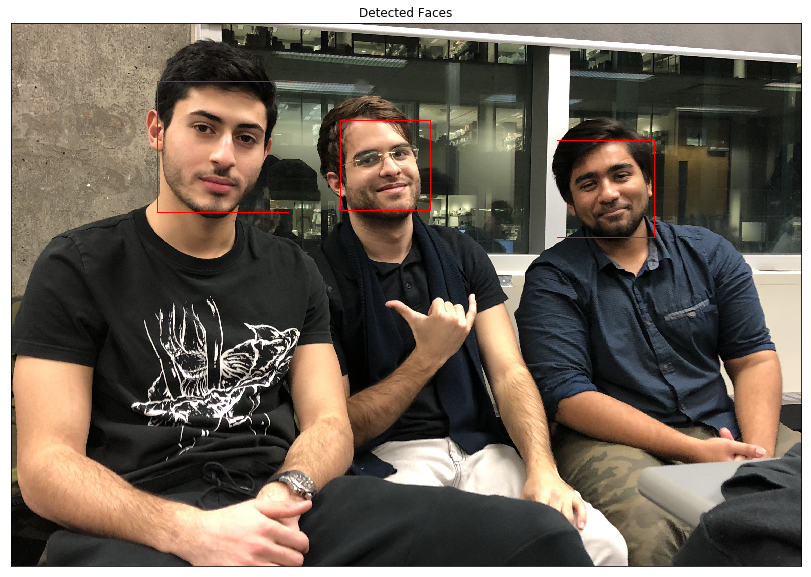

In [12]:
#####################
# FACE DETECTOR LBP #
#####################
#copy paste from tutorial

import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

# 'pip install opencv-contrib-python' to solve datapath issue
data_path = '/anaconda3/lib/python3.6/site-packages/cv2/data/'
# print(data_path) # /anaconda3/lib/python3.6/site-packages/cv2/data/

group = cv2.imread('GROUP.JPG')
# convert to grayscale
grey_img = group

# use cascading classifier (lbp)
face_cascade = cv2.CascadeClassifier( os.path.join(data_path, 'haarcascade_frontalface_default.xml'))
faces = face_cascade.detectMultiScale(grey_img, 1.3 ,4)

print("Faces found:", len(faces))

# print(face_cascade)

for(x,y,w,h) in faces:
    cv2.rectangle(group, (x,y), (x+w,y+h), (0,0,255),2)

# display images
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(group, cv2.COLOR_BGR2RGB))
plt.title("Detected Faces"), plt.xticks([]), plt.yticks([])
plt.show()

# Theory Part4 

The viola Jones detector requires full view of the front of the face, without tilting, and eyes should be pointed towards the camera. Clearly works better than my algorithm as it is able to detect faces. No false positives found as i altered the minNeighbours and Scalefactor parameters

Viola Jones will work and PCA wouldnt when used to detect faces in Videos. 

